<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
    Drug Label Text Extraction with Optical Character Recognition (OCR)
</div>


<div style="text-align: center; font-size:140%; font-weight: bold; color: #20a0ff;">
     Automated Text Extraction and Visualization with PaddleOCR
</div>

    
---
    
<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | Oct 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> |
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> |
  <a href="https://github.com/Duygu-Jones">GitHub</a> |
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> |
  <a href="https://medium.com/@duygujones">Medium</a> |
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</div>    

### <font color=#20a0ff> <b>Project Overview</b> </font>

Imagine you're at home, feeling tired after a long day, and you need to check the instructions on a medication bottle or food package. The text might be too small, the lighting could be poor, or you’re just too exhausted to focus properly. In such moments, trying to read these labels becomes frustrating and prone to mistakes.

This project aims to automate the extraction and clear visualization of text from drug labels using Optical Character Recognition (OCR) technology. Whether the writing is faint, the environment isn’t ideal, or you’re simply too tired, this tool provides quick access to important information, making daily tasks smoother and more stress-free. Automating this process helps healthcare professionals, patients, and individuals avoid errors and ensures crucial information is easy to read.

### <font color=#20a0ff> <b>What is OCR?</b> </font>

Optical Character Recognition (OCR) is a technology that converts printed or handwritten text in images into machine-readable text. This allows easy digitization, making information searchable and accessible in digital formats.

#### <font color=#20a0ff> <b>About PaddleOCR</b> </font>

PaddleOCR is an open-source OCR tool developed by PaddlePaddle, offering multi-language support, lightweight architecture, and fast processing capabilities. Compared to EasyOCR, PaddleOCR provides more flexibility in handling complex layouts and low-resolution images, making it more robust for tasks like drug label text extraction. While EasyOCR is known for its simplicity and ease of use, PaddleOCR excels in efficiency and accuracy, especially when working with large datasets or requiring real-time performance. Additionally, PaddleOCR's pre-trained models are optimized for multiple languages, giving it a broader scope for multilingual applications.

### <font color=#20a0ff> <b>Significance and Applications</b> </font>

Automating text extraction from drug labels speeds up the process and eliminates errors caused by difficult-to-read packaging. In healthcare, quick and accurate access to drug information can improve patient safety and care. For individuals, it simplifies reading labels in challenging situations, such as poor lighting or worn-out text. The tool can also assist in medication management, automated pharmacy inventory checks, and help those with visual impairments by making text easily accessible.

### <font color=#20a0ff> <b>Project Execution Steps</b> </font>

1. **Data Collection**: Drug label images were gathered from random sources on the internet.
2. **Model Setup**: PaddleOCR was configured to detect and extract text from the images.
3. **Automation Process**: The OCR model automatically scanned, detected, and extracted the text from each label, reducing manual effort.
3. **Text Detection and Recognition**: The model extracted text from the labels and stored it.
4. **Visualization**: The detected text was annotated on the images for a clear, visual representation.

### <font color=#20a0ff> <b>Conclusion</b> </font>

The project demonstrates how PaddleOCR can be effectively used to automate drug label text extraction. By simplifying access to essential information, this tool can positively impact healthcare and everyday life, improving safety and efficiency in reading labels.

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Setup and Initialization</p> 

In [ ]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu -i https://pypi.org/simple

In [3]:
# Install paddle OCR
!pip install paddleocr

In [ ]:
# Clone paddle OCR repo to get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

In [4]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Model Setup</p> 

In [5]:
# Setup model
ocr_model = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 4.51MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:00<00:00, 10.7MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 2.81MiB/s]


[2024/10/07 17:42:55] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [31]:
img_path = os.path.join('.', '/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/drugs_data/drug4.jpeg')

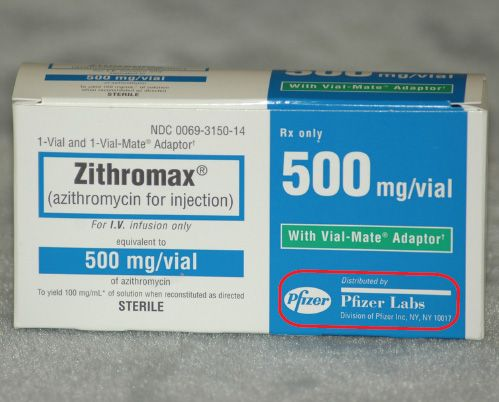

In [34]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread(img_path))

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;">Text Extraction Process</p> 

In [8]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2024/10/07 17:46:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process

[2024/10/07 17:46:10] ppocr DEBUG: dt_boxes num : 19, elapsed : 0.023055076599121094

[2024/10/07 17:46:10] ppocr DEBUG: rec_res num  : 19, elapsed : 0.07972478866577148


In [9]:
result

[[[[[285.0, 80.0], [446.0, 83.0], [446.0, 93.0], [285.0, 90.0]],
   ("Wln ViatMate Aaaetor'", 0.6446784138679504)],
  [[[150.0, 124.0], [247.0, 124.0], [247.0, 136.0], [150.0, 136.0]],
   ('NDC0069-3150-14', 0.9915821552276611)],
  [[[279.0, 124.0], [324.0, 128.0], [323.0, 142.0], [277.0, 139.0]],
   ('Rx only', 0.9251769781112671)],
  [[[36.0, 134.0], [195.0, 138.0], [195.0, 152.0], [36.0, 148.0]],
   ('1-Vial and 1-Vial-Mate Adaptor', 0.9503440856933594)],
  [[[280.0, 146.0], [375.0, 148.0], [373.0, 200.0], [278.0, 198.0]],
   ('500', 0.9991191029548645)],
  [[[72.0, 159.0], [209.0, 163.0], [208.0, 189.0], [71.0, 185.0]],
   ('Zithromax', 0.9952157139778137)],
  [[[373.0, 175.0], [455.0, 175.0], [455.0, 202.0], [373.0, 202.0]],
   ('mg/vial', 0.9969578385353088)],
  [[[49.0, 189.0], [233.0, 193.0], [233.0, 210.0], [49.0, 206.0]],
   ('(azithromycin for injection)', 0.9625909924507141)],
  [[[89.0, 217.0], [192.0, 219.0], [192.0, 233.0], [89.0, 231.0]],
   ('For l.V.intusion only', 0.

In [14]:
# Loop through the outer list and then the inner list to get all results
for outer in result:
    for res in outer:
        print(res[1][1])  # This will print the confidence score


0.6446784138679504

0.9915821552276611

0.9251769781112671

0.9503440856933594

0.9991191029548645

0.9952157139778137

0.9969578385353088

0.9625909924507141

0.8929488062858582

0.9144604206085205

0.9779095649719238

0.9700927138328552

0.8220854997634888

0.9418075680732727

0.6826454997062683

0.961231529712677

0.9975391030311584

0.9673730731010437

0.7891485095024109


In [15]:
# Extract bounding boxes, texts, and scores from the nested structure
boxes = [res[0] for outer in result for res in outer]  # Extract the bounding box coordinates
texts = [res[1][0] for outer in result for res in outer]  # Extract the detected text (string)
scores = [res[1][1] for outer in result for res in outer]  # Extract the confidence score (float)

In [16]:
# Bounding box coordinates
boxes

[[[285.0, 80.0], [446.0, 83.0], [446.0, 93.0], [285.0, 90.0]],
 [[150.0, 124.0], [247.0, 124.0], [247.0, 136.0], [150.0, 136.0]],
 [[279.0, 124.0], [324.0, 128.0], [323.0, 142.0], [277.0, 139.0]],
 [[36.0, 134.0], [195.0, 138.0], [195.0, 152.0], [36.0, 148.0]],
 [[280.0, 146.0], [375.0, 148.0], [373.0, 200.0], [278.0, 198.0]],
 [[72.0, 159.0], [209.0, 163.0], [208.0, 189.0], [71.0, 185.0]],
 [[373.0, 175.0], [455.0, 175.0], [455.0, 202.0], [373.0, 202.0]],
 [[49.0, 189.0], [233.0, 193.0], [233.0, 210.0], [49.0, 206.0]],
 [[89.0, 217.0], [192.0, 219.0], [192.0, 233.0], [89.0, 231.0]],
 [[114.0, 236.0], [169.0, 237.0], [168.0, 247.0], [114.0, 246.0]],
 [[287.0, 228.0], [444.0, 232.0], [443.0, 246.0], [286.0, 241.0]],
 [[83.0, 249.0], [197.0, 252.0], [196.0, 273.0], [83.0, 269.0]],
 [[34.0, 284.0], [247.0, 289.0], [246.0, 303.0], [34.0, 298.0]],
 [[109.0, 276.0], [173.0, 276.0], [173.0, 287.0], [109.0, 287.0]],
 [[343.0, 276.0], [364.0, 276.0], [364.0, 283.0], [343.0, 283.0]],
 [[290.0, 2

In [17]:
# detected text
texts

["Wln ViatMate Aaaetor'",
 'NDC0069-3150-14',
 'Rx only',
 '1-Vial and 1-Vial-Mate Adaptor',
 '500',
 'Zithromax',
 'mg/vial',
 '(azithromycin for injection)',
 'For l.V.intusion only',
 'equivalent to',
 'With Vial-MateAdaptor',
 '500 mg/vial',
 'To yield 100 mg/mLof solution when econstittd as drected',
 'ot azithromycin',
 'Pistrih',
 'Pfizer',
 'STERILE',
 'Pfizer Labs',
 'Division ofPzer IncNy NY 1001']

In [18]:
#  confidence score
scores

[0.6446784138679504,
 0.9915821552276611,
 0.9251769781112671,
 0.9503440856933594,
 0.9991191029548645,
 0.9952157139778137,
 0.9969578385353088,
 0.9625909924507141,
 0.8929488062858582,
 0.9144604206085205,
 0.9779095649719238,
 0.9700927138328552,
 0.8220854997634888,
 0.9418075680732727,
 0.6826454997062683,
 0.961231529712677,
 0.9975391030311584,
 0.9673730731010437,
 0.7891485095024109]

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;">Visualization of the Predictions</p> 

In [19]:
# Specifying font path for draw_ocr method
font_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/PaddleOCR', 'doc', 'fonts', 'latin.ttf')
font_path

'/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/PaddleOCR/doc/fonts/latin.ttf'

In [23]:
# import image
img = cv2.imread(img_path)

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

(402, 499, 3)

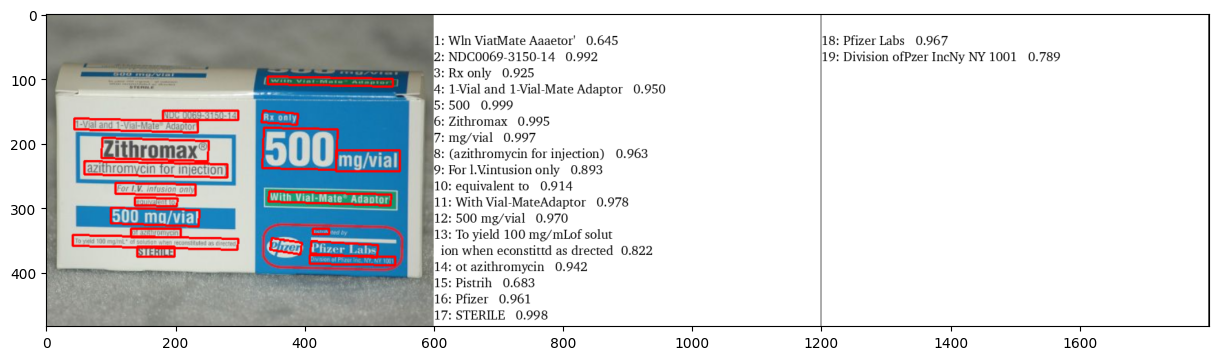

In [21]:
# Visualize the image and detections
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

# show the image using matplotlib
plt.imshow(annotated)

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;">Automated Text Extraction on Samples</p> 

In [24]:
def perform_ocr_and_visualize(img_path, ocr_model, font_path):
    """
    Function to perform OCR on an image, extract detected components, and visualize the results.

    Parameters:
    - img_path: Path to the input image file.
    - ocr_model: Initialized PaddleOCR model.
    - font_path: Path to the font file for visualization.
    """

    # Run the ocr method on the ocr model
    result = ocr_model.ocr(img_path)

    # Extract bounding boxes, texts, and scores from the nested structure
    boxes = [res[0] for outer in result for res in outer]  # Extract the bounding box coordinates
    texts = [res[1][0] for outer in result for res in outer]  # Extract the detected text (string)
    scores = [res[1][1] for outer in result for res in outer]  # Extract the confidence score (float)

    # Import the image
    img = cv2.imread(img_path)

    # Reorder the color channels
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Visualize the image and detections
    plt.figure(figsize=(15, 15))

    # Draw annotations on the image
    annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)

    # Show the annotated image using matplotlib
    plt.imshow(annotated)
    plt.axis('off')  # Hide the axes
    plt.show()

[2024/10/07 17:51:41] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process

[2024/10/07 17:51:43] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.03986954689025879

[2024/10/07 17:51:43] ppocr DEBUG: rec_res num  : 20, elapsed : 0.12196040153503418


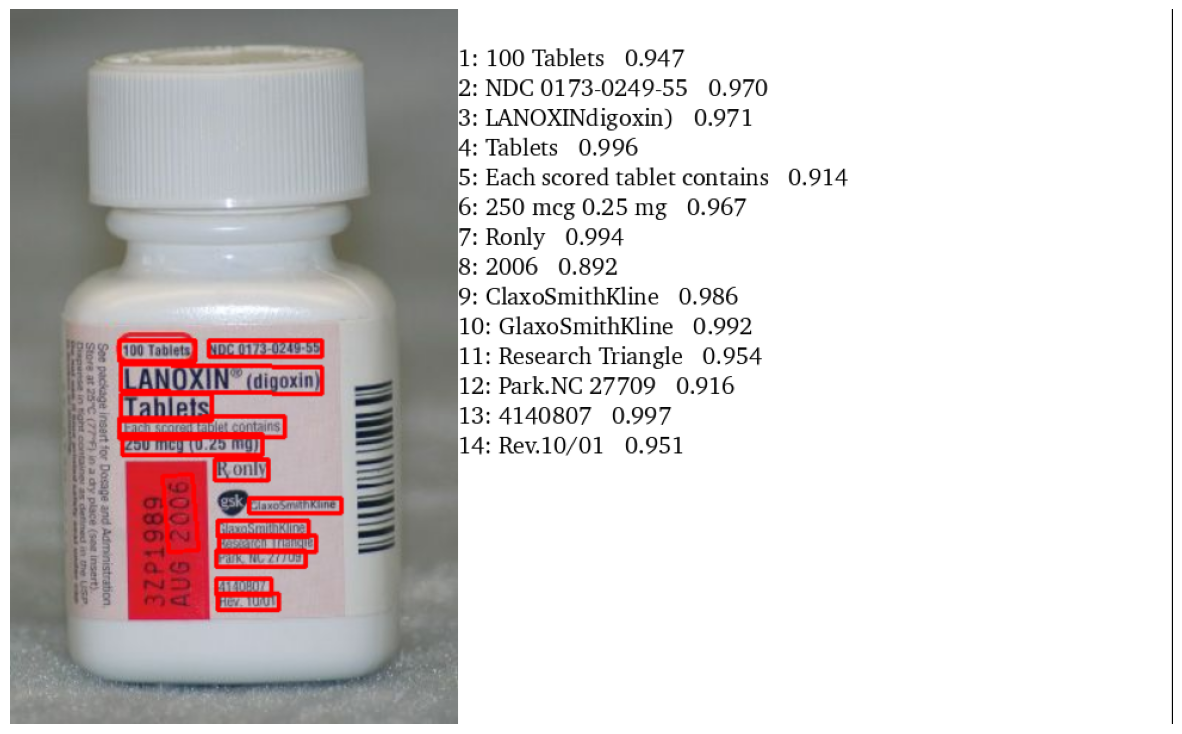

In [25]:
# Another image exampe1:
img_path = '/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/drugs_data/drug5.jpeg'

# Call the function with the updated img_path and ocr_model
perform_ocr_and_visualize(img_path, ocr_model, font_path)

[2024/10/07 17:51:52] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process

[2024/10/07 17:51:54] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.0994558334350586

[2024/10/07 17:51:54] ppocr DEBUG: rec_res num  : 15, elapsed : 0.06912779808044434


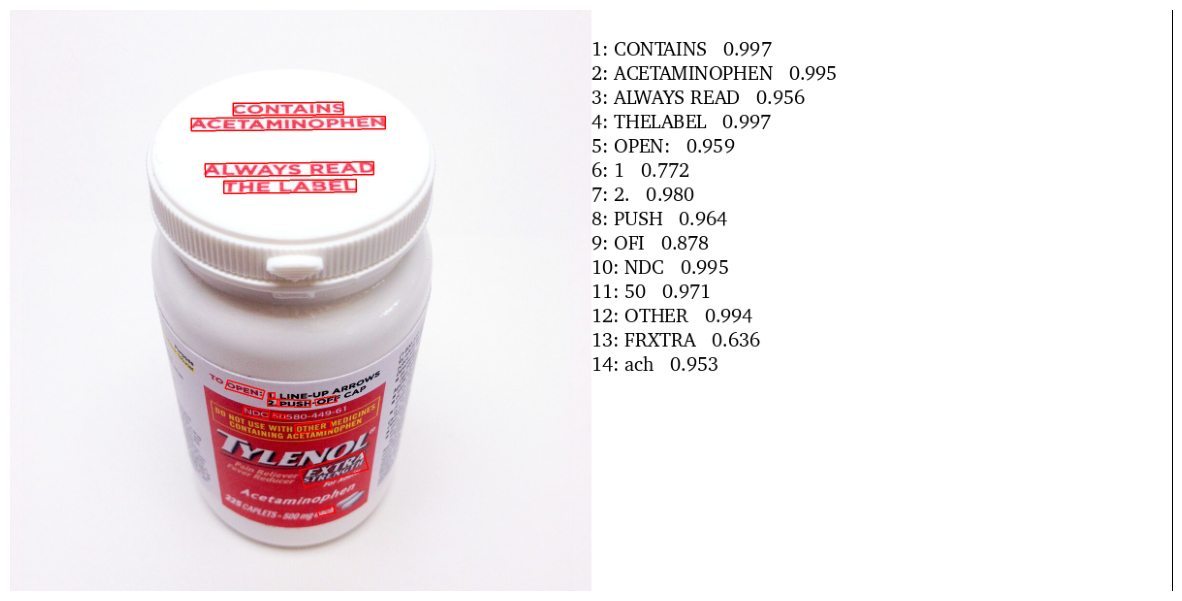

In [26]:
# Another image example2:
img_path = '/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/drugs_data/drug6.jpeg'

# Call the function with the updated img_path and ocr_model
perform_ocr_and_visualize(img_path, ocr_model, font_path)

[2024/10/07 17:52:04] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process

[2024/10/07 17:52:05] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.26504945755004883

[2024/10/07 17:52:05] ppocr DEBUG: rec_res num  : 30, elapsed : 0.2001659870147705


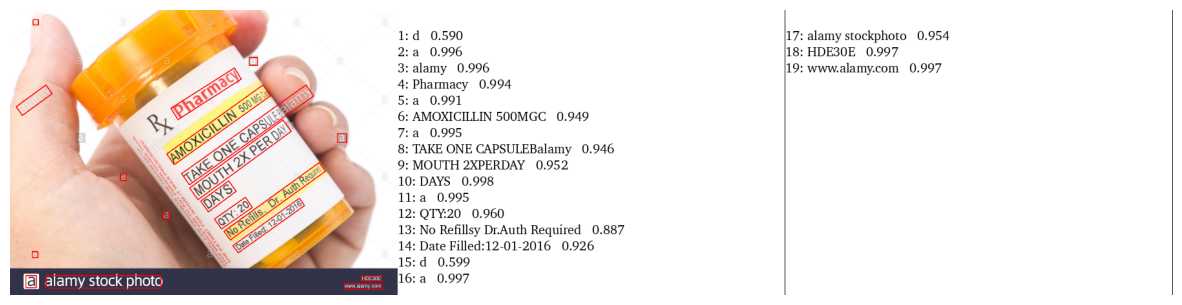

In [27]:
# Another image example3:
img_path = '/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/drugs_data/drug3.jpg'

# Call the function with the updated img_path and ocr_model
perform_ocr_and_visualize(img_path, ocr_model, font_path)

[2024/10/07 17:52:29] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process

[2024/10/07 17:52:30] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.039968013763427734

[2024/10/07 17:52:30] ppocr DEBUG: rec_res num  : 25, elapsed : 0.097381591796875


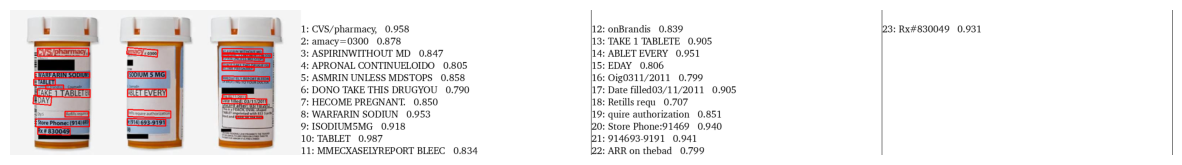

In [28]:
# Another image example4:
img_path = '/content/drive/MyDrive/Colab Notebooks/03-CV/Capstone_Projects/OCR-Paddle/drugs_data/drug2.jpg'

# Call the function with the updated img_path and ocr_model
perform_ocr_and_visualize(img_path, ocr_model, font_path)

### <font color=#20a0ff> <b>References</b> </font>

- This project utilizes **[PaddleOCR GitHub Repository](https://github.com/PaddlePaddle/PaddleOCR)**, an open-source tool developed by PaddlePaddle for efficient text detection and recognition.
- The inspiration for this project came from a demonstration video by **[Nicholas Renotte](https://www.youtube.com/watch?v=t5xwQguk9XU)**.
- For further technical details, the methodology is based on the paper **[PP-OCR: A Practical Ultra Lightweight OCR System](https://arxiv.org/pdf/2009.09941v3)**.

<div style="text-align: center; font-weight: bold;font-size:120%;">
 If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
    Thank you...
</div>

---

<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> |
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> |
  <a href="https://github.com/Duygu-Jones">GitHub</a> |
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> |
  <a href="https://medium.com/@duygujones">Medium</a> |
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>

    
</div>   